<a href="https://colab.research.google.com/github/anggisotomani/Sentiment-Analysis/blob/main/Ride_Hailing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Packages and Import Library**

In [1]:
# Install packages
!pip install sastrawi
!pip install gensim
!pip install nltk
!pip install wordcloud
!pip install tensorflow
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 546.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_ver

In [1]:
# Import libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import datetime as dt
import re
import string
from io import StringIO
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# NLP libraries
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from gensim.models import Word2Vec
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer

# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy import sparse

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Loading Dataset**

In [2]:
# Download dataset dari GitHub
!wget -O dataset.csv "https://raw.githubusercontent.com/anggisotomani/Dataset/refs/heads/main/Ridehailing_Dataset.csv"

--2025-05-31 20:12:31--  https://raw.githubusercontent.com/anggisotomani/Dataset/refs/heads/main/Ridehailing_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19870087 (19M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  18.95M   112MB/s    in 0.2s    

2025-05-31 20:12:32 (112 MB/s) - ‘dataset.csv’ saved [19870087/19870087]



In [3]:
df = pd.read_csv('/content/dataset.csv')
df

userName  score                   at  \
0         Pengguna Google      1  2025-05-30 17:59:43   
1         Pengguna Google      5  2025-05-30 17:20:36   
2         Pengguna Google      3  2025-05-30 16:41:04   
3         Pengguna Google      5  2025-05-30 16:07:27   
4         Pengguna Google      4  2025-05-30 15:54:02   
...                   ...    ...                  ...   
199995         Erwin Said      5  2024-12-09 00:52:12   
199996        Dim Dimyati      5  2024-12-09 00:42:03   
199997         Basa Riyan      5  2024-12-09 00:36:58   
199998         Rizal Eddy      5  2024-12-09 00:27:12   
199999  arif rahman soleh      5  2024-12-09 00:23:27   

                                                  content  appName  
0                                useless aplication...lol  inDrive  
1                                           sangat bagus,  inDrive  
2       Kenapa saya di bisa login ke aplikasi ini ya,P...  inDrive  
3                                                     oke  inDrive  
4       sy cb ubah kendaraan udh proses bbrpa hri hsil...  inDrive  
...                                                   ...      ...  
199995                        pelayanan nya semakin baik.    Maxim  
199996                                             Mantap    Maxim  
199997  Order telah dipenuhi oleh: Angga Saputra denga...    Maxim  
199998                                             mantap    Maxim  
199999                             terimaksih mas driver.    Maxim  

[200000 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   userName  200000 non-null  object
 1   score     200000 non-null  int64 
 2   at        200000 non-null  object
 3   content   199999 non-null  object
 4   appName   200000 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.6+ MB


# **Preprocessing Text**

In [5]:
clean_df = df.dropna()

In [6]:
clean_df = clean_df.drop_duplicates()
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [7]:
clean_df.drop(['userName', 'score', 'at'], axis=1, inplace=True)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199998 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  199998 non-null  object
 1   appName  199998 non-null  object
dtypes: object(2)
memory usage: 4.6+ MB


In [9]:
#Cleaning
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'[^\x00-\x7F]+', '', text) # menghapus karakter non-ASCII (termasuk emoji)
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

#Casefolding
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

#Normalization
# Menghapus kata-kata Slang
slangwords = {
    "@": "di",
    "abg": "abang",
    "abis": "habis",
    "acc": "setuju",
    "ad": "ada",
    "adain": "adakan",
    "aja": "saja",
    "ajah": "saja",
    "aj": "saja",
    "ancur": "hancur",
    "alhasil": "hasilnya",
    "alhamdulilah": "alhamdulillah",
    "alesan": "alasan",
    "ama": "sama",
    "aamiin": "amin",
    "anj": "anjing",
    "ajg": "anjing",
    "ajh": "saja",
    "anter": "antar",
    "anyep": "tidak menarik",
    "apl": "aplikasi",
    "aplikator": "pengguna",
    "apk": "aplikasi",
    "apknya": "aplikasinya",
    "app": "aplikasi",
    "apps": "aplikasi",
    "asu": "anjing",
    "bagu": "bagus",
    "bro": "kawan",
    "baikk": "baik",
    "bagusss": "bagus",
    "baguss": "bagus",
    "bagussssssssss": "bagus",
    "bales": "balas",
    "bang": "abang",
    "bangat": "amat",
    "bener": "benar",
    "bnget": "sekali",
    "bgtt": "sekali",
    "bangett": "sekali",
    "batalin": "sekali",
    "bawa": "bawah",
    "bikin": "membuat",
    "bgs": "bagus",
    "bgus": "bagus",
    "byr": "bayar",
    "byar": "bayar",
    "bnyk": "banyak",
    "bego": "bodoh",
    "bgt": "sekali",
    "belom": "belum",
    "benerin": "perbaiki",
    "best": "bagus",
    "blm": "belum",
    "bln": "bulan",
    "blom": "belum",
    "blum": "belum",
    "bnyak": "banyak",
    "bngt": "sekali",
    "bodo": "bodoh",
    "bobrok": "berantakan",
    "bodoh": "bodoh",
    "boleh": "boleh",
    "bs": "bisa",
    "bsa": "bisa",
    "btk": "bentuk",
    "bruk": "buruk",
    "buru": "buruk",
    "byk": "banyak",
    "byr": "bayar",
    "cape": "lelah",
    "capek": "lelah",
    "cencel": "batal",
    "cb": "coba",
    "cba": "coba",
    "costomer": "customer",
    "castamer": "customer",
    "costumer": "customer",
    "cansel": "batal",
    "cepet": "cepat",
    "cmn": "cuma",
    "cpt": "cepat",
    "cs": "teman",
    "cuan": "untung",
    "cust": "customer",
    "cuman": "cuma",
    "dapet": "dapat",
    "dapetnya": "dapatnya",
    "dtang": "datang",
    "dtg": "datang",
    "dateng": "datang",
    "dev": "developer",
    "dicancel": "dibatalkan",
    "dibatalin": "dibatalkan",
    "dipake": "dipakai",
    "diskon": "diskon",
    "dll": "dan lain lain",
    "dlm": "dalam",
    "dlu": "dulu",
    "dn": "dan",
    "deket": "dekat",
    "doang": "saja",
    "dpat": "dapat",
    "dpt": "dapat",
    "dpet": "dapat",
    "drive": "driver",
    "drever": "driver",
    "dtg": "datang",
    "emang": "memang",
    "emg": "memang",
    "eror": "error",
    "ngga": "tidak",
    "nggak": "tidak",
    "gak": "tidak",
    "g": "tidak",
    "ga": "tidak",
    "gw": "aku",
    "gabisa": "tidak bisa",
    "gacor": "hebat",
    "gamau": "tidak mau",
    "gara": "karena",
    "garis": "garis",
    "gatau": "tidak tau",
    "gede": "besar",
    "gg": "bagus",
    "genting": "genting",
    "gmn": "gimana",
    "gajelas": "tidak jelas",
    "gimna": "gimana",
    "gk": "tidak",
    "gausah": "tidak usah",
    "glitch": "kesalahan",
    "gmna": "gimana",
    "gojeg": "gojek",
    "goodjob": "kerja bagus",
    "grab": "grab",
    "grap": "grab",
    "great": "hebat",
    "gercep": "gerakan cepat",
    "greb": "grab",
    "gue": "saya",
    "gua": "aku",
    "gx": "tidak",
    "halo": "halo",
    "hallo": "halo",
    "harus": "harus",
    "hebat": "hebat",
    "hrs": "harus",
    "hrus": "harus",
    "ijo": "hijau",
    "indri": "indrive",
    "inddriver": "indrive",
    "indrivesudah": "indrive sudah",
    "indriver": "indrive",
    "indrever": "indrive",
    "instal": "install",
    "jln": "jalan",
    "jangan": "jangan",
    "jelasss": "jelas",
    "jdi": "jadi",
    "jd": "jadi",
    "jelek": "buruk",
    "jg": "juga",
    "jga": "juga",
    "jgn": "jangan",
    "jgnn": "jangan",
    "jls": "jelas",
    "josss": "jos",
    "juga": "juga",
    "jln": "jalan",
    "k": "ke",
    "ka": "abang",
    "kk": "kakak",
    "kak": "kakak",
    "kagak": "tidak",
    "kaka": "kakak",
    "kalo": "kalau",
    "kalo": "kalau",
    "kalw": "kalau",
    "karna": "karena",
    "karena": "karena",
    "kasih": "kasih",
    "kaga": "tidak",
    "kasi": "kasih",
    "kepotong": "terpotong",
    "kerenn": "keren",
    "kek": "seperti",
    "kemaren": "kemarin",
    "khl": "khusus",
    "kl": "kalau",
    "klau": "kalau",
    "klw": "kalau",
    "komen": "komentar",
    "knpa": "kenapa",
    "knp": "kenapa",
    "knapa": "kenapa",
    "kost": "kos",
    "kost2an": "kos-kosan",
    "ko": "kok",
    "kok": "kok",
    "koq": "kenapa",
    "ksh": "kasih",
    "kasian": "kasihan",
    "krn": "karena",
    "klo": "kalau",
    "krna": "karena",
    "ksih": "kasih",
    "kya": "kaya",
    "lah": "lah",
    "lahh": "lah",
    "lbih": "lebih",
    "lbh": "lebih",
    "lelet": "lambat",
    "liat": "lihat",
    "lgsg": "langsung",
    "lngsung": "langsung",
    "lgi": "lagi",
    "lh": "lah",
    "luck": "beruntung",
    "lu": "kau",
    "mager": "malas gerak",
    "mah": "saja",
    "makasi": "makasih",
    "maks": "maksimal",
    "mksih": "makasih",
    "malem": "malam",
    "maling": "pencuri",
    "males": "malas",
    "mantaaap": "mantap",
    "mantaps": "mantap",
    "mantaf": "mantap",
    "mantappp": "mantap",
    "mantapppp": "mantap",
    "mantappa": "mantap",
    "mantapp": "mantap",
    "mantul": "mantap",
    "mantab": "mantap",
    "map": "peta",
    "markotop": "terbaik",
    "masi": "masih",
    "masukin": "masukan",
    "mesen": "pesan",
    "make": "pakai",
    "mau": "mau",
    "males": "malas",
    "menit": "menit",
    "menyalaa": "menyala",
    "mesan": "pesan",
    "min": "anda",
    "mkin": "makin",
    "msh": "masih",
    "mlh": "malah",
    "mulu": "selalu",
    "mo": "mau",
    "mod": "modifikasi",
    "mnt": "menit",
    "mntap": "mantap",
    "muter": "putar",
    "nambah": "tambah",
    "narik": "tarik",
    "nantap": "mantap",
    "nda": "tidak",
    "ndak": "tidak",
    "nego": "negosiasi",
    "ngeluh": "mengeluh",
    "nih": "ini",
    "nganter": "antar",
    "ngambil": "ambil",
    "ngawur": "asal-asalan",
    "ngaco": "asal-asalan",
    "ngasih": "kasih",
    "nyuruh": "menyuruh",
    "nggak": "tidak",
    "ngga": "tidak",
    "ngomong": "bicara",
    "ngk": "tidak",
    "ngotak": "rasional",
    "ngeselin": "menyebalkan",
    "ngasih": "kasih",
    "nganter": "antar",
    "ngebut": "balap",
    "nanya": "tanya",
    "nyasar": "tersesat",
    "nyusahin": "menyusahkan",
    "nolak": "menolak",
    "ngebantu": "membantu",
    "no": "tidak",
    "nunggu": "menunggu",
    "nemu": "ketemu",
    "nungguin": "menunggu",
    "nyangkut": "tersangkut",
    "naikin": "menaikan",
    "nyampe": "sampai",
    "nyari": "mencari",
    "nyobain": "mencoba",
    "nyesel": "menyesal",
    "ok": "oke",
    "okey": "oke",
    "okelah": "oke",
    "okee": "oke",
    "ol": "online",
    "onlen": "online",
    "onl": "online",
    "ongkir": "ongkos kirim",
    "otw": "dalam perjalanan",
    "pak": "bapak",
    "pake": "pakai",
    "pakek": "pakai",
    "pdhal": "padahal",
    "pas": "saat",
    "pdhl": "padahal",
    "playstore": "play store",
    "pelan2": "pelan-pelan",
    "pesenan": "pesanan",
    "pencet": "klik",
    "plg": "paling",
    "plis": "tolong",
    "pengen": "ingin",
    "pls": "tolong",
    "pngn": "ingin",
    "pesen": "pesan",
    "pnting": "penting",
    "ponakan": "keponakan",
    "pokoke": "pokoknya",
    "pisan": "sekali",
    "pdahal": "padahal",
    "prcuma": "percuma",
    "promo": "promosi",
    "puter": "putar",
    "putus": "terputus",
    "q": "saya",
    "rider": "driver",
    "ribet": "rumit",
    "rmh": "rumah",
    "rmhnya": "rumahnya",
    "rp": "rupiah",
    "rb": "ribu",
    "sampe": "sampai",
    "sampek": "sampai",
    "sbg": "sebagai",
    "sbgai": "sebagai",
    "sbr": "sabar",
    "sedia": "sedia",
    "selow": "santai",
    "slow": "lambat",
    "sempet": "sempat",
    "seneng": "senang",
    "sgt": "sangat",
    "sering": "sering",
    "sesuaiin": "sesuaikan",
    "sinyal": "sinyal",
    "supir": "sopir",
    "sip": "bagus",
    "siip": "bagus",
    "sdh": "sudah",
    "sipp": "bagus",
    "skrg": "sekarang",
    "skrng": "sekarang",
    "skrang": "sekarang",
    "slalu": "selalu",
    "sllu": "selalu",
    "sll": "selalu",
    "sma": "sama",
    "sm": "sama",
    "sia": "percuma",
    "smua": "semua",
    "smpe": "sampai",
    "sistim": "sistem",
    "sangatt": "sangat",
    "smua": "semua",
    "smw": "semua",
    "smp": "sampai",
    "sndiri": "sendiri",
    "sok": "silakan",
    "sory": "maaf",
    "soryy": "maaf",
    "sruh": "suruh",
    "sudh": "sudah",
    "skali": "sekali",
    "sy": "saya",
    "sya": "saya",
    "syg": "sayang",
    "tdk": "tidak",
    "tdk bisa": "tidak bisa",
    "telat": "terlambat",
    "temen": "teman",
    "tengkyu": "terima kasih",
    "thx": "terima kasih",
    "tks": "terima kasih",
    "tsb": "tersebut",
    "tpi": "tapi",
    "tlg": "tolong",
    "tmn": "teman",
    "tnpa": "tanpa",
    "tp": "tapi",
    "tetep": "tetap",
    "tq": "terima kasih",
    "ttp": "tetap",
    "trs": "terus",
    "trima": "terima",
    "tarifnya": "harganya",
    "tibatiba": "tiba-tiba",
    "ojol": "ojek online",
    "jm": "jam",
    "wkt": "waktu",
    "naek": "naik",
    "kebuka": "terbuka",
    "skli": "sekali",
    "ngasi": "kasih",
    "lamaa": "lama",
    "maxsim": "maxim",
    "lol ": "bodoh",
    "useless": "tidak berguna",
    "aplicationlol": "aplikasi tolol",
    "tingkatkn": "tingkatkan",
    "bbrpa": "beberapa",
    "hri": "hari,",
    "hsil": "hasil",
    "trimakasih": "terima kasih",
    "trimakasihh": "terima kasih",
    "terimakasih": "terima kasih",
    "trs2an": "terusan",
    "trnyata": "ternyata",
    "tlp": "telepon",
    "telp": "telepon",
    "tf": "transfer",
    "tuh": "itu",
    "trus": "terus",
    "tutor": "panduan",
    "udh": "sudah",
    "udh2": "sudah",
    "ugalan":"semberono",
    "udah": "sudah",
    "udhhh": "sudah",
    "ujung2": "ujung-ujungnya",
    "user": "pengguna",
    "utk": "untuk",
    "vocer": "voucher",
    "vocher": "voucher",
    "waze": "navigasi",
    "wktu": "waktu",
    "wouwww": "wow",
    "wkwk": "tertawa",
    "wkwkwk": "tertawa",
    "x": "kali",
    "yaa": "ya",
    "yapadahal": "ya padahal",
    "y": "ya",
    "yg": "yang",
    "yng": "yang",
    "yt": "youtube",
    "zamannya": "zaman",
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

#Tokenizing
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

#Stopwords Removal
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','nya','na', 'b', 'pa', 'dri', 'ny', 'dr', 'utk', 'deh', 'sih', 'ku','di', "ya", "yg", "loh","kah", "si", "sih", "dgn", "X", "woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_final'] = clean_df['text_stopword'].apply(toSentence)

# Tampilkan
clean_df.head(10)

content  appName  \
0                           useless aplication...lol  inDrive   
1                                      sangat bagus,  inDrive   
2  Kenapa saya di bisa login ke aplikasi ini ya,P...  inDrive   
3                                                oke  inDrive   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...  inDrive   
5                                            terbaik  inDrive   
6  tolong masalah orderan seharus nya yg di utama...  inDrive   
7  akun saya belum di ACC jadi driver indrive,sud...  inDrive   
8                                     sangat berguna  inDrive   
9              sangat bagus tingkatkn lgi kinerjanya  inDrive   

                                          text_clean  \
0                              useless aplicationlol   
1                                       sangat bagus   
2  Kenapa saya di bisa login ke aplikasi ini yaPa...   
3                                                oke   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...   
5                                            terbaik   
6  tolong masalah orderan seharus nya yg di utama...   
7  akun saya belum di ACC jadi driver indrivesuda...   
8                                     sangat berguna   
9              sangat bagus tingkatkn lgi kinerjanya   

                                text_casefoldingText  \
0                              useless aplicationlol   
1                                       sangat bagus   
2  kenapa saya di bisa login ke aplikasi ini yapa...   
3                                                oke   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...   
5                                            terbaik   
6  tolong masalah orderan seharus nya yg di utama...   
7  akun saya belum di acc jadi driver indrivesuda...   
8                                     sangat berguna   
9              sangat bagus tingkatkn lgi kinerjanya   

                                     text_slangwords  \
0                       tidak berguna aplikasi tolol   
1                                       sangat bagus   
2  kenapa saya di bisa login ke aplikasi ini ya p...   
3                                                oke   
4  saya coba ubah kendaraan sudah proses beberapa...   
5                                            terbaik   
6  tolong masalah orderan seharus nya yang di uta...   
7  akun saya belum di setuju jadi driver indrive ...   
8                                     sangat berguna   
9            sangat bagus tingkatkan lagi kinerjanya   

                                 text_tokenizingText  \
0                  [tidak, berguna, aplikasi, tolol]   
1                                    [sangat, bagus]   
2  [kenapa, saya, di, bisa, login, ke, aplikasi, ...   
3                                              [oke]   
4  [saya, coba, ubah, kendaraan, sudah, proses, b...   
5                                          [terbaik]   
6  [tolong, masalah, orderan, seharus, nya, yang,...   
7  [akun, saya, belum, di, setuju, jadi, driver, ...   
8                                  [sangat, berguna]   
9      [sangat, bagus, tingkatkan, lagi, kinerjanya]   

                                       text_stopword  \
0                         [berguna, aplikasi, tolol]   
1                                            [bagus]   
2        [login, aplikasi, hp, ram, masuk, aplikasi]   
3                                              [oke]   
4  [coba, ubah, kendaraan, proses, ,, hasil, tola...   
5                                          [terbaik]   
6  [tolong, orderan, seharus, utamain, akun, repu...   
7  [akun, setuju, driver, indrive, accbelum, tomb...   
8                                          [berguna]   
9                    [bagus, tingkatkan, kinerjanya]   

                                          text_final  
0                             berguna aplikasi tolol  
1                                              bagus  
2               login aplikasi hp ram masuk aplikasi  
3                       

# **Labeling**

In [11]:
# Membuat dictionary kosong untuk menyimpan kata-kata positif beserta nilai intensitasnya
lexicon_positive = dict()

# Mengambil data lexicon positif dari URL
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# Mengecek apakah permintaan HTTP berhasil (status code 200)
if response.status_code == 200:
    # Membaca data CSV dari respons teks menggunakan csv.reader
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Memasukkan setiap baris data ke dalam dictionary lexicon_positive
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])  # row[0]: kata, row[1]: nilai intensitas
else:
    # Menampilkan pesan kesalahan jika gagal mengambil data
    print("Failed to fetch positive lexicon data")

# Membuat dictionary kosong untuk menyimpan kata-kata negatif beserta nilai intensitasnya
lexicon_negative = dict()

# Mengambil data lexicon negatif dari URL
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# Mengecek apakah permintaan HTTP berhasil (status code 200)
if response.status_code == 200:
    # Membaca data CSV dari respons teks menggunakan csv.reader
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Memasukkan setiap baris data ke dalam dictionary lexicon_negative
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])  # row[0]: kata, row[1]: nilai intensitas
else:
    # Menampilkan pesan kesalahan jika gagal mengambil data
    print("Failed to fetch negative lexicon data")

In [12]:
def sentiment_analysis_lexicon_indonesia(text):
    # Inisialisasi variabel skor untuk menghitung nilai sentimen
    score = 0
    # Menghitung skor
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [13]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    132159
neutral      36004
negative     31835
Name: count, dtype: int64


In [14]:
clean_df.head()

content  appName  \
0                           useless aplication...lol  inDrive   
1                                      sangat bagus,  inDrive   
2  Kenapa saya di bisa login ke aplikasi ini ya,P...  inDrive   
3                                                oke  inDrive   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...  inDrive   

                                          text_clean  \
0                              useless aplicationlol   
1                                       sangat bagus   
2  Kenapa saya di bisa login ke aplikasi ini yaPa...   
3                                                oke   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...   

                                text_casefoldingText  \
0                              useless aplicationlol   
1                                       sangat bagus   
2  kenapa saya di bisa login ke aplikasi ini yapa...   
3                                                oke   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...   

                                     text_slangwords  \
0                       tidak berguna aplikasi tolol   
1                                       sangat bagus   
2  kenapa saya di bisa login ke aplikasi ini ya p...   
3                                                oke   
4  saya coba ubah kendaraan sudah proses beberapa...   

                                 text_tokenizingText  \
0                  [tidak, berguna, aplikasi, tolol]   
1                                    [sangat, bagus]   
2  [kenapa, saya, di, bisa, login, ke, aplikasi, ...   
3                                              [oke]   
4  [saya, coba, ubah, kendaraan, sudah, proses, b...   

                                       text_stopword  \
0                         [berguna, aplikasi, tolol]   
1                                            [bagus]   
2        [login, aplikasi, hp, ram, masuk, aplikasi]   
3                                              [oke]   
4  [coba, ubah, kendaraan, proses, ,, hasil, tola...   

                                          text_final  polarity_score  polarity  
0                             berguna aplikasi tolol              -4  negative  
1                                              bagus               2  positive  
2               login aplikasi hp ram masuk aplikasi             -11  negative  
3                                                oke               2  positive  
4  coba ubah kendaraan proses , hasil tolak sesua...               5  positive

# **DATA SPLIT DAN EKSTRAKSI FITUR MENGGUNAKAN Word2Vec DAN TF-IDF**

# **Penggabungan TF-IDF dan Word2vec**

# **Split Data**

In [15]:
# Data preparation
X = clean_df['text_final']
y = clean_df['polarity'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

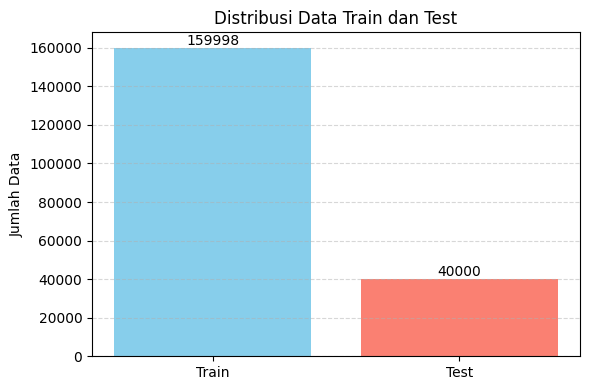

In [17]:
# Hitung jumlah data
train_len = len(y_train)
test_len = len(y_test)

# Label dan jumlah
data_split = [train_len, test_len]
labels = ['Train', 'Test']

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, data_split, color=['skyblue', 'salmon'])
plt.title('Distribusi Data Train dan Test')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tambahkan jumlah di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# **TF-IDF dan Word2vec**

In [18]:
# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=1300, min_df=17, max_df=0.8)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Tampilkan
features_df.head()

abal  abang  abangnya   ac  adakan  adil  admin   ah  ajak  ajar  ...  \
0   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0   0.0   0.0  ...   
1   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0   0.0   0.0  ...   
2   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0   0.0   0.0  ...   
3   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0   0.0   0.0  ...   
4   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0   0.0   0.0  ...   

   wangi  warna  wifi  wilayah  worth  wow   xl  yaaa  yah  zona  
0    0.0    0.0   0.0      0.0    0.0  0.0  0.0   0.0  0.0   0.0  
1    0.0    0.0   0.0      0.0    0.0  0.0  0.0   0.0  0.0   0.0  
2    0.0    0.0   0.0      0.0    0.0  0.0  0.0   0.0  0.0   0.0  
3    0.0    0.0   0.0      0.0    0.0  0.0  0.0   0.0  0.0   0.0  
4    0.0    0.0   0.0      0.0    0.0  0.0  0.0   0.0  0.0   0.0  

[5 rows x 1300 columns]

In [19]:
# Tampilkan vocabulary dalam format terstruktur
print("Vocabulary:")
for word, index in tfidf.vocabulary_.items():
    print(f"{word}: {index}")

Vocabulary:
bayar: 108
minimal: 741
kasih: 475
solusi: 1122
biar: 158
layanan: 589
mantap: 636
update: 1271
versi: 1280
autobid: 67
sistem: 1113
kelen: 499
merata: 727
gada: 341
prio: 973
asik: 57
terima: 1192
jarak: 437
ongkos: 827
kirim: 539
ribu: 1025
masuk: 647
akal: 10
gojek: 368
mendingan: 687
maxim: 654
membantu: 661
perjalanan: 931
kota: 562
aplikasi: 46
tolol: 1230
tau: 1171
nomor: 802
hilang: 406
lupa: 615
disuruh: 284
login: 607
pakai: 851
kocak: 544
email: 316
rapi: 996
sopan: 1126
pesan: 942
nyaman: 812
mas: 645
banget: 89
ramah: 991
pelayanan: 866
bagus: 74
drivernya: 304
oke: 821
responsif: 1017
amanah: 30
parah: 855
rusak: 1037
otomatis: 843
manual: 638
orderan: 835
customer: 219
cancel: 199
ulasan: 1266
semoga: 1084
top: 1234
kaya: 481
mitranya: 746
perhatikan: 928
biaya: 160
tambahan: 1159
driver: 302
menunggu: 716
sebelah: 1061
engga: 320
good: 371
order: 834
dipenuhi: 271
motorcycle: 759
warna: 1291
hitam: 408
nopol: 804
rating: 999
nice: 798
job: 453
error: 321
apl

In [20]:
# Word2Vec Feature Extraction
X_train_tokens = X_train.apply(lambda x: x.split())
X_test_tokens = X_test.apply(lambda x: x.split())
w2v_model = Word2Vec(sentences=X_train_tokens,
                    vector_size=300,
                    window=5,
                    min_count=2,
                    negative=10,
                    workers=4,
                    sg=1)

# Fungsi untuk mengubah kalimat menjadi vektor rata-rata kata-katanya
def vectorize_text(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Jika tidak ada kata yang ditemukan, kembalikan vektor nol
    return np.mean(word_vectors, axis=0)  # Rata-rata vektor kata

# Ekstraksi fitur dengan Word2Vec
X_w2v = np.array([vectorize_text(text, w2v_model) for text in X_train])

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame (X_w2v)
# Tampilkan
features_df.head()

0         1         2         3         4         5         6    \
0 -0.043012  0.158076  0.032438 -0.013061  0.016938 -0.156155  0.060056   
1  0.179939  0.175754 -0.176073 -0.061958  0.137576 -0.055807  0.164020   
2 -0.029069  0.298183 -0.009331 -0.339270  0.094067 -0.284388 -0.141997   
3  0.121797 -0.022800  0.172082  0.043405 -0.057459 -0.210479  0.194304   
4 -0.065730  0.154328 -0.071182  0.002339  0.054563 -0.112409  0.038520   

        7         8         9    ...       290       291       292       293  \
0  0.310877  0.049511 -0.061829  ...  0.124835  0.070241  0.087150  0.098744   
1  0.417898  0.054796 -0.043113  ...  0.293775  0.227423  0.343567  0.411381   
2  0.394546 -0.058836 -0.211181  ...  0.315448  0.313289  0.440445  0.223480   
3  0.466939 -0.024665  0.013082  ...  0.106363  0.137265  0.100377  0.010862   
4  0.217467 -0.019846 -0.122321  ...  0.195087  0.122135  0.207773  0.199417   

        294       295       296       297       298       299  
0 -0.246675  0.180039 -0.045749  0.089537  0.029397 -0.152032  
1 -0.075450  0.117698 -0.019704  0.308696 -0.046143 -0.235841  
2 -0.047374  0.085108  0.081920  0.002186  0.010774 -0.029053  
3  0.027929  0.110531  0.118705  0.135366  0.075023 -0.200133  
4 -0.126839  0.116453  0.008459 -0.023822  0.071308 -0.221297  

[5 rows x 300 columns]

In [21]:
# Tampilkan vocabulary Word2Vec dalam format terstruktur
def vocabulary(model):
    # Dapatkan vocabulary dan urutkan berdasarkan indeks
    vocabulary = list(model.wv.index_to_key)

    print("Vocabulary Word2Vec:")
    for index, word in enumerate(vocabulary):
        # Tampilkan kata dan indeksnya
        print(f"{word}: {index}")

        # Batasi output jika vocabulary terlalu besar
        if index > 10:  # Hanya tampilkan 20 kata pertama
            break

# Tampilkan Vocabulary
vocabulary(w2v_model)

Vocabulary Word2Vec:
driver: 0
aplikasi: 1
bagus: 2
mantap: 3
ramah: 4
oke: 5
kasih: 6
membantu: 7
terima: 8
tolong: 9
cepat: 10
gojek: 11


In [22]:
def get_weighted_vectors(text, w2v_model, tfidf):
    tokens = text.split()
    tfidf_vector = tfidf.transform([' '.join(tokens)]).toarray()[0]
    word_vectors = []

    for token in tokens:
        if token in w2v_model.wv and token in tfidf.vocabulary_:
            # Mengambil bobot TF-IDF untuk token
            tfidf_weight = tfidf_vector[tfidf.vocabulary_[token]]
            # Mengalikan vektor Word2Vec dengan bobot TF-IDF
            weighted_vector = w2v_model.wv[token] * tfidf_weight
            word_vectors.append(weighted_vector)

    if not word_vectors:
        return np.zeros(w2v_model.vector_size)

    return np.mean(word_vectors, axis=0)

In [23]:
# Mengkombinasikan fitur TF-IDF dan Word2Vec
X_train_w2v = np.array([get_weighted_vectors(text, w2v_model, tfidf) for text in X_train])
X_test_w2v = np.array([get_weighted_vectors(text, w2v_model, tfidf) for text in X_test])

In [24]:
# Menggabungkan kedua fitur
X_train_combined = sparse.hstack((X_train_tfidf, sparse.csr_matrix(X_train_w2v))).toarray()
X_test_combined = sparse.hstack((X_test_tfidf, sparse.csr_matrix(X_test_w2v))).toarray()

In [25]:
X_train_combined

array([[ 0.        ,  0.        ,  0.        , ...,  0.06174849,
         0.00203008, -0.06565658],
       [ 0.        ,  0.        ,  0.        , ...,  0.20706141,
        -0.03204479, -0.18124229],
       [ 0.        ,  0.        ,  0.        , ..., -0.00707249,
         0.00595017, -0.01075681],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.08080586,
         0.04310821, -0.03542465],
       [ 0.        ,  0.        ,  0.        , ...,  0.36166525,
         0.13999568, -0.11985765],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
# Reshape
X_train_reshaped = X_train_combined.reshape((X_train_combined.shape[0], 1, X_train_combined.shape[1]))
X_test_reshaped = X_test_combined.reshape((X_test_combined.shape[0], 1, X_test_combined.shape[1]))

# Label encoding
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Cek bentuk data setelah konversi
print(f'Bentuk y_train_cat: {y_train_cat.shape}')
print(f'Bentuk y_test_cat: {y_test_cat.shape}')

Bentuk y_train_cat: (159998, 3)
Bentuk y_test_cat: (40000, 3)


# **Modeling**

# **RNN**

In [27]:
# Model RNN
model_rnn = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    SimpleRNN(64),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 128)         │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,611 (924.26 KB)

 Trainable params: 236,227 (922.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [28]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [30]:
# Training model
history = model_rnn.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.8494 - loss: 0.3900 - val_accuracy: 0.9461 - val_loss: 0.1746
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9345 - loss: 0.2042 - val_accuracy: 0.9498 - val_loss: 0.1627
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.9425 - loss: 0.1846 - val_accuracy: 0.9550 - val_loss: 0.1517
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9468 - loss: 0.1771 - val_accuracy: 0.9555 - val_loss: 0.1492
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.9488 - loss: 0.1719 - val_accuracy: 0.9557 - val_loss: 0.1489
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9521 - loss: 0.1636 - val_accuracy: 0.9571 - val_loss: 0.1458
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - accuracy: 0.9525 - loss: 0.1592 - val_accuracy: 0.9567 - val_loss: 0.1498
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.9537 - loss: 

In [31]:
# Evaluasi model
test_loss, test_accuracy = model_rnn.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9580


In [32]:
# Evaluasi model
train_loss, train_accuracy = model_rnn.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_rnn.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9619
Testing Accuracy: 0.9580
Training Loss: 0.1282
Testing Loss: 0.1415


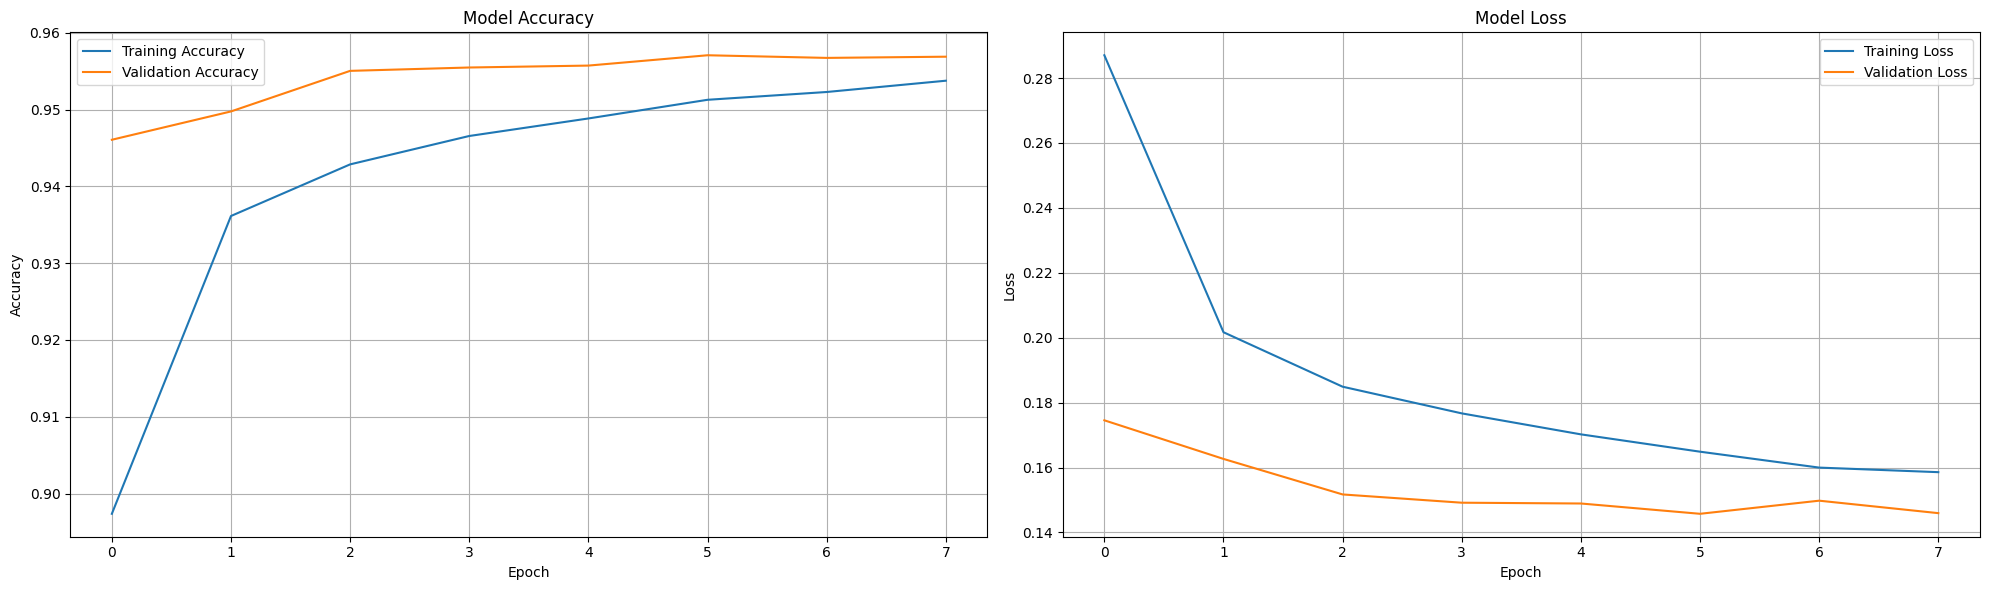

In [33]:
# Buat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


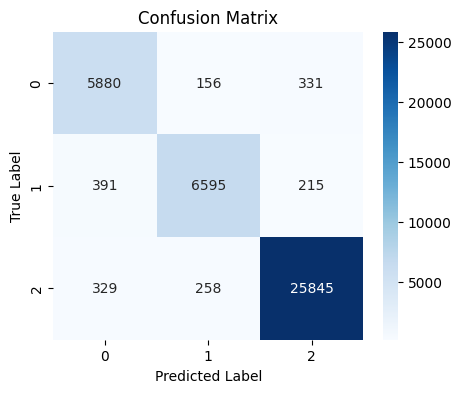

In [34]:
# Prediksi
y_pred = model_rnn.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [35]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.92      0.91      6367
     Neutral       0.94      0.92      0.93      7201
    Positive       0.98      0.98      0.98     26432

    accuracy                           0.96     40000
   macro avg       0.94      0.94      0.94     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


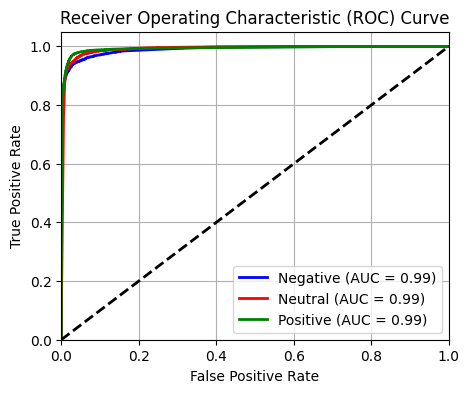


AUC Scores:
Negative: 0.9895
Neutral: 0.9906
Positive: 0.9928


In [36]:
# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_rnn.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **LSTM**

In [37]:
# Model LSTM
model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       885,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 937,603 (3.58 MB)

 Trainable params: 937,219 (3.58 MB)

 Non-trainable params: 384 (1.50 KB)

In [38]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [40]:
# Training model
history = model_lstm.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 78s 18ms/step - accuracy: 0.8737 - loss: 0.3378 - val_accuracy: 0.9476 - val_loss: 0.1718
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 70s 18ms/step - accuracy: 0.9425 - loss: 0.1836 - val_accuracy: 0.9535 - val_loss: 0.1538
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 84s 18ms/step - accuracy: 0.9517 - loss: 0.1639 - val_accuracy: 0.9513 - val_loss: 0.1564
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 79s 17ms/step - accuracy: 0.9557 - loss: 0.1497 - val_accuracy: 0.9557 - val_loss: 0.1494
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 84s 18ms/step - accuracy: 0.9564 - loss: 0.1504 - val_accuracy: 0.9587 - val_loss: 0.1439
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.9581 - loss: 0.1437 - val_accuracy: 0.9578 - val_loss: 0.1438
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 81s 18ms/step - accuracy: 0.9613 - loss: 0.1332 - val_accuracy: 0.9581 - val_loss: 0.1445
Epoch 7: early stopping
Restoring model weights from the end of the best epo

In [41]:
# Evaluasi model
test_loss, test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9595


In [42]:
# Evaluasi model
train_loss, train_accuracy = model_lstm.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9650
Testing Accuracy: 0.9595
Training Loss: 0.1184
Testing Loss: 0.1400


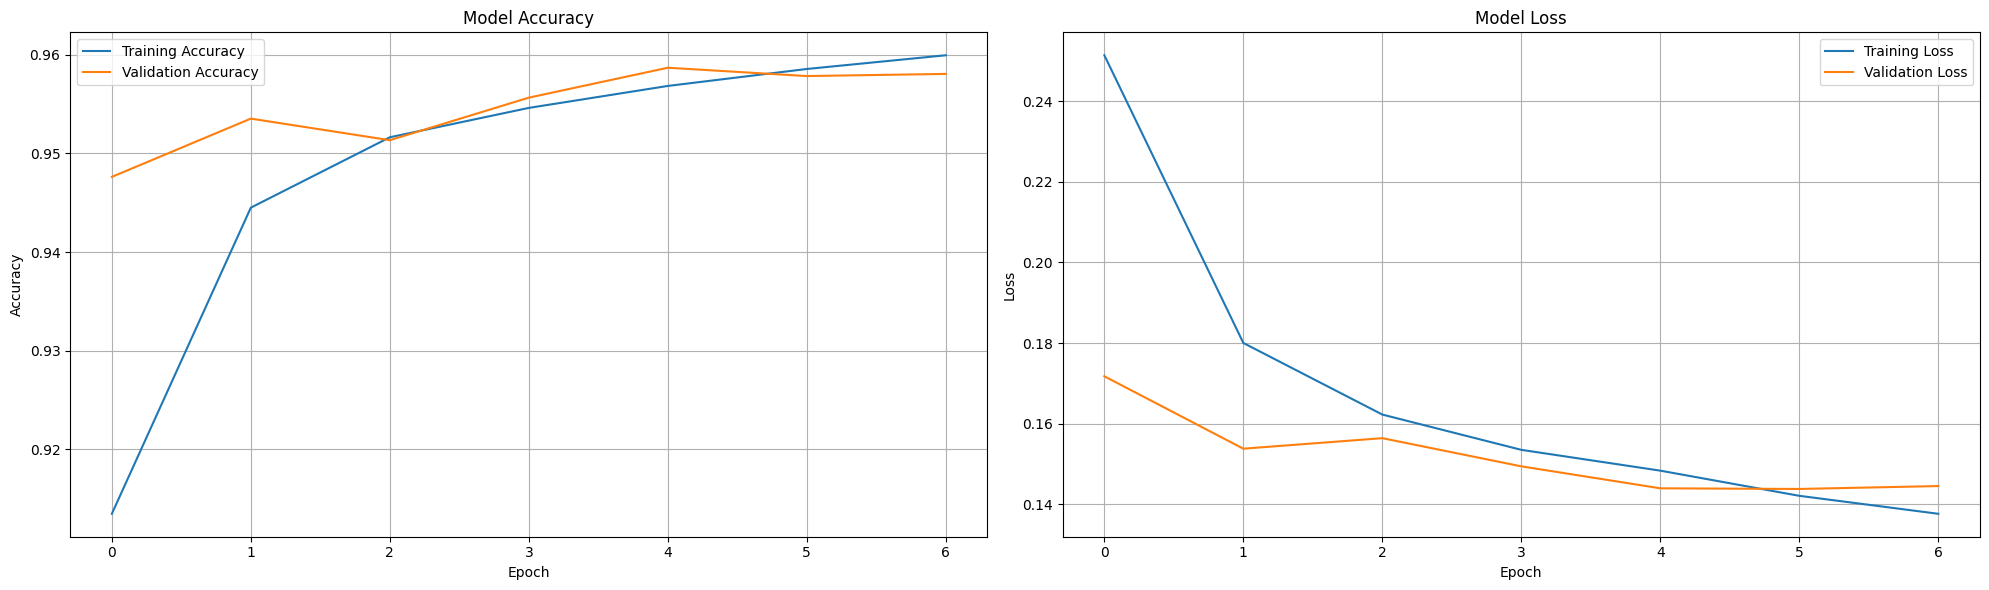

In [43]:
# Buat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


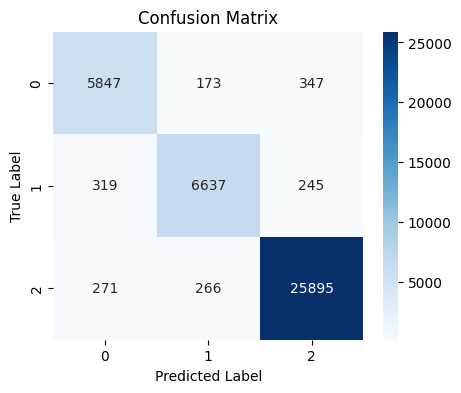

In [44]:
# Prediksi
y_pred = model_lstm.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [45]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.92      0.91      6367
     Neutral       0.94      0.92      0.93      7201
    Positive       0.98      0.98      0.98     26432

    accuracy                           0.96     40000
   macro avg       0.94      0.94      0.94     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


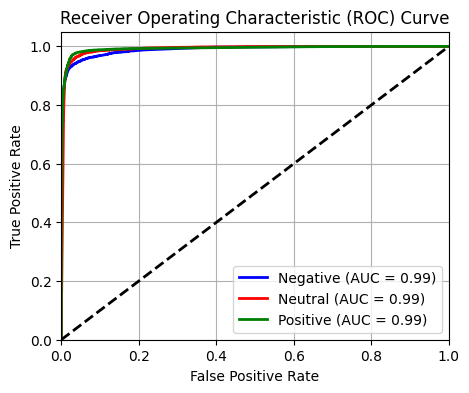


AUC Scores:
Negative: 0.9892
Neutral: 0.9907
Positive: 0.9926


In [46]:
# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_lstm.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **Bi-LSTM**

In [47]:
# Model BiLSTM
model_BiLSTM = Sequential([
    Bidirectional(LSTM(128, return_sequences=True),
                 input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Tampilkan ringkasan model
model_BiLSTM.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │     1,770,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,940,611 (7.40 MB)

 Trainable params: 1,939,843 (7.40 MB)

 Non-trainable params: 768 (3.00 KB)

In [48]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_BiLSTM.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [50]:
# Training model
history = model_BiLSTM.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 138s 32ms/step - accuracy: 0.8692 - loss: 0.3521 - val_accuracy: 0.9478 - val_loss: 0.1664
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 142s 32ms/step - accuracy: 0.9437 - loss: 0.1799 - val_accuracy: 0.9510 - val_loss: 0.1640
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 143s 33ms/step - accuracy: 0.9521 - loss: 0.1583 - val_accuracy: 0.9560 - val_loss: 0.1501
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 141s 33ms/step - accuracy: 0.9558 - loss: 0.1497 - val_accuracy: 0.9569 - val_loss: 0.1456
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 136s 34ms/step - accuracy: 0.9581 - loss: 0.1421 - val_accuracy: 0.9587 - val_loss: 0.1451
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 131s 33ms/step - accuracy: 0.9598 - loss: 0.1375 - val_accuracy: 0.9587 - val_loss: 0.1468
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 142s 33ms/step - accuracy: 0.9605 - loss: 0.1340 - val_accuracy: 0.9601 - val_loss: 0.1449
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 141s 33ms/step - accuracy: 

In [51]:
# Evaluasi model
test_loss, test_accuracy = model_BiLSTM.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9603


In [52]:
# Evaluasi model
train_loss, train_accuracy = model_BiLSTM.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_BiLSTM.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9682
Testing Accuracy: 0.9603
Training Loss: 0.1119
Testing Loss: 0.1395


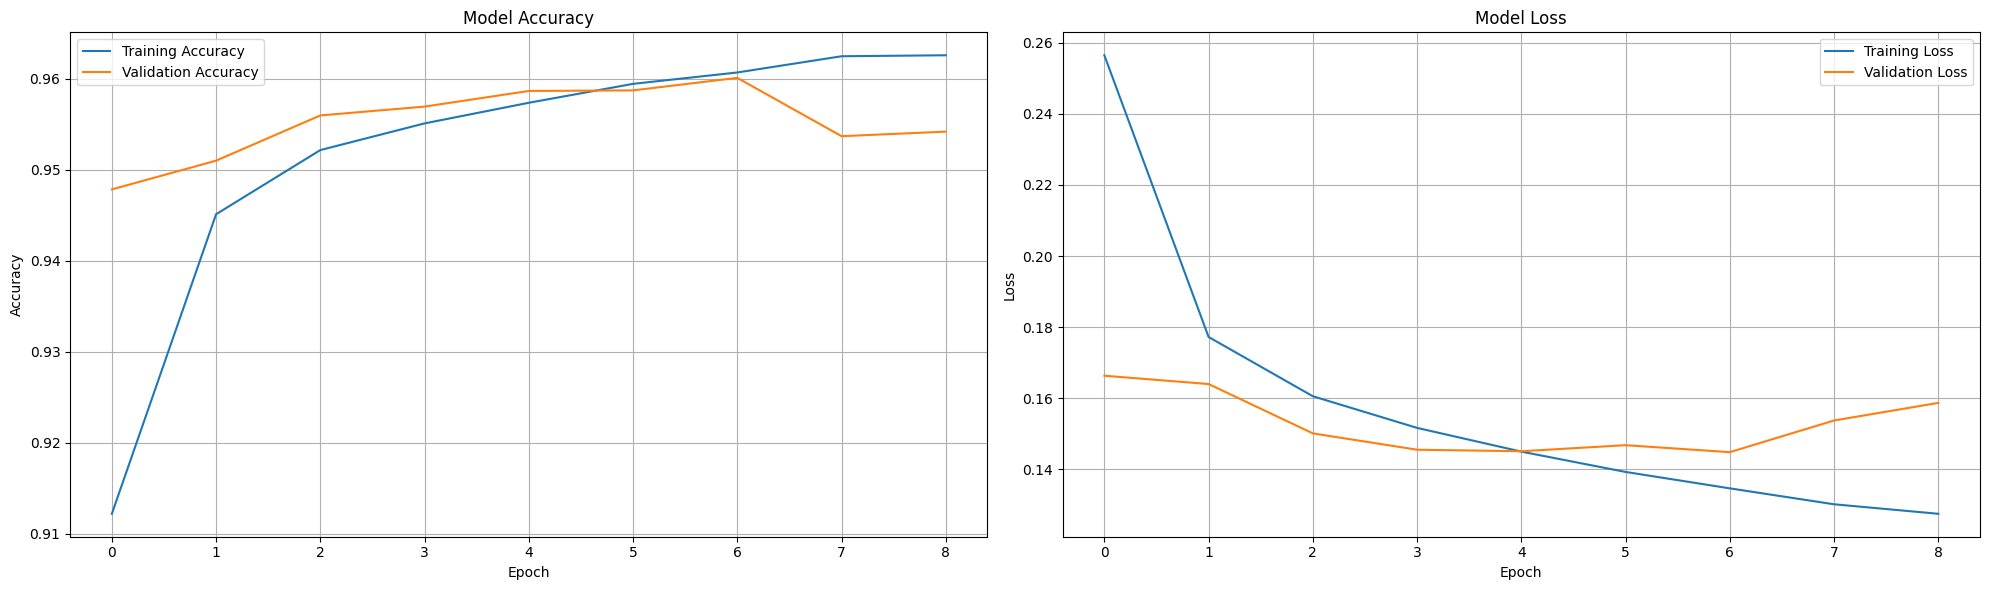

In [53]:
# Buat figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step


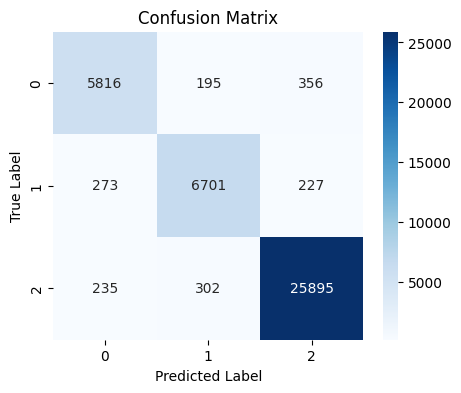

In [54]:
# Prediksi
y_pred = model_BiLSTM.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [55]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.91      0.92      6367
     Neutral       0.93      0.93      0.93      7201
    Positive       0.98      0.98      0.98     26432

    accuracy                           0.96     40000
   macro avg       0.94      0.94      0.94     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step


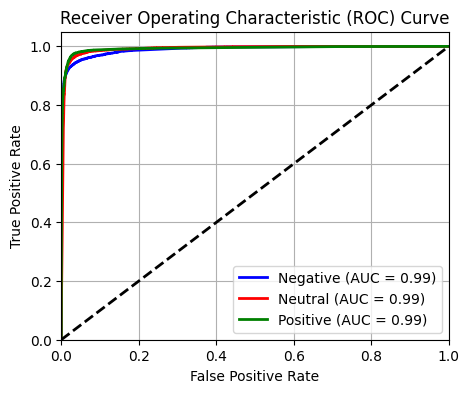


AUC Scores:
Negative: 0.9896
Neutral: 0.9912
Positive: 0.9928


In [56]:
# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_BiLSTM.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **Deployment**

# **Visualisasi**

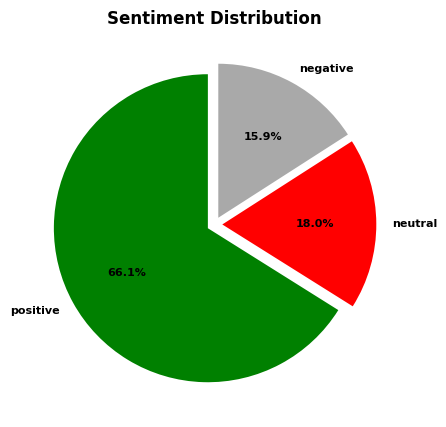

In [57]:
# Data sentiment
sentiment_counts = clean_df['polarity'].value_counts()

# Memberi jarak Chart
explode = [0.05] * len(sentiment_counts)

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#008000', '#FF0000', '#A9A9A9'],
    explode=explode,
    textprops={'fontsize': 8, 'weight': 'bold'}
)
plt.title('Sentiment Distribution', fontsize=12, weight='bold')
plt.show()

<Figure size 1200x600 with 0 Axes>

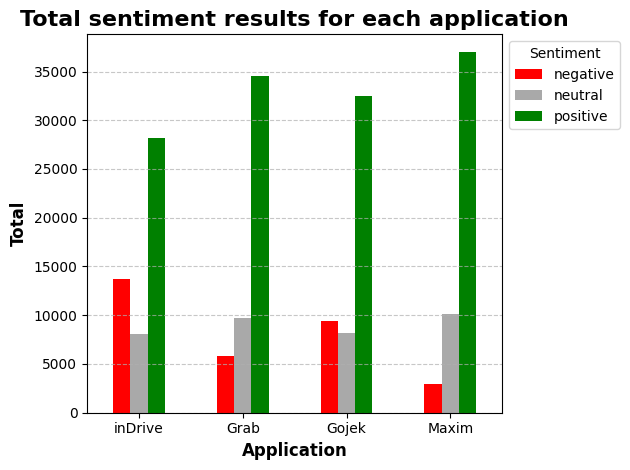

<Figure size 1200x600 with 0 Axes>

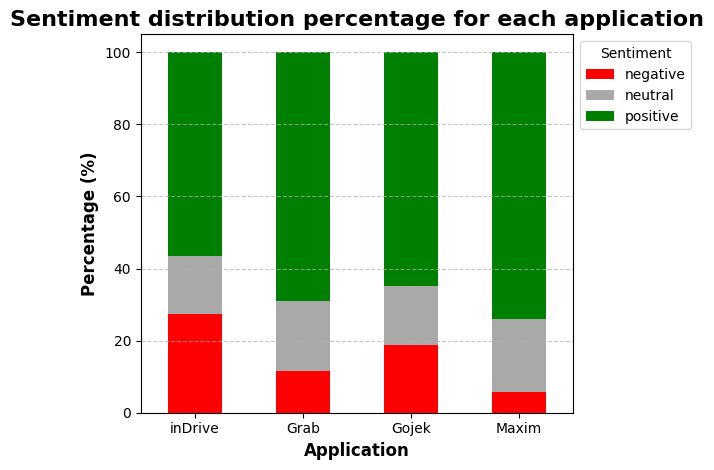

In [58]:
# Data preparation
applications = ['inDrive', 'Grab', 'Gojek', 'Maxim']

# Filter and summarize sentiment counts
summary_data = clean_df.groupby(['appName', 'polarity']).size().unstack(fill_value=0).loc[applications]

# Grafik batang: Jumlah absolut sentimen
plt.figure(figsize=(12, 6))
summary_data.plot(kind='bar', stacked=False, color=['#FF0000', '#A9A9A9', '#008000'])
plt.title('Total sentiment results for each application', fontsize=16, weight='bold')
plt.ylabel('Total', fontsize=12, weight='bold')
plt.xlabel('Application', fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Grafik batang bertumpuk: Persentase distribusi sentimen
summary_percent = (summary_data.T / summary_data.sum(axis=1)).T * 100

plt.figure(figsize=(12, 6))
summary_percent.plot(kind='bar', stacked=True, color=['#FF0000', '#A9A9A9', '#008000'])
plt.title('Sentiment distribution percentage for each application', fontsize=16, weight='bold')
plt.ylabel('Percentage (%)', fontsize=12, weight='bold')
plt.xlabel('Application', fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
# Tabel ringkasan
summary_data['Total'] = summary_data.sum(axis=1)
summary_percent['Positive (%)'] = summary_percent['positive']
summary_percent['Neutral (%)'] = summary_percent['neutral']
summary_percent['Negative (%)'] = summary_percent['negative']

summary_table = pd.concat([summary_data, summary_percent[['Positive (%)', 'Neutral (%)', 'Negative (%)']]], axis=1)
print(summary_table)

polarity  negative  neutral  positive  Total  Positive (%)  Neutral (%)  \
appName                                                                   
inDrive      13719     8051     28229  49999     56.459129    16.102322   
Grab          5778     9710     34511  49999     69.023380    19.420388   
Gojek         9408     8138     32454  50000     64.908000    16.276000   
Maxim         2930    10105     36965  50000     73.930000    20.210000   

polarity  Negative (%)  
appName                 
inDrive      27.438549  
Grab         11.556231  
Gojek        18.816000  
Maxim         5.860000  


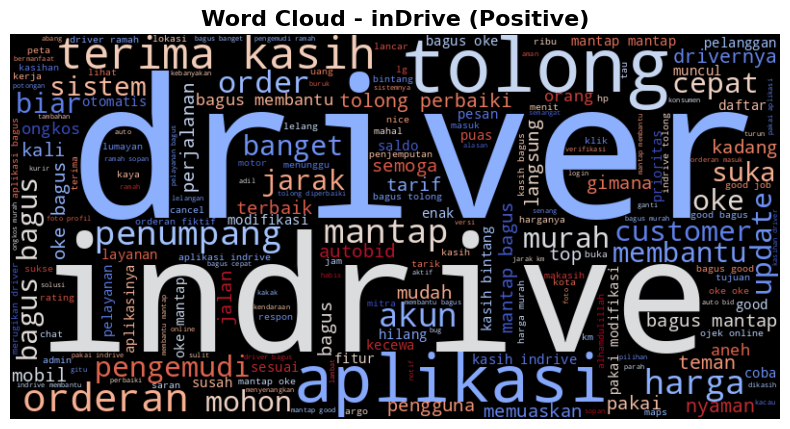

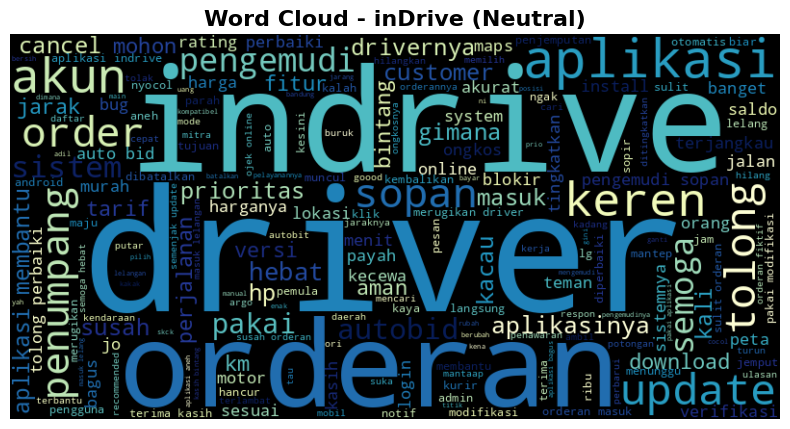

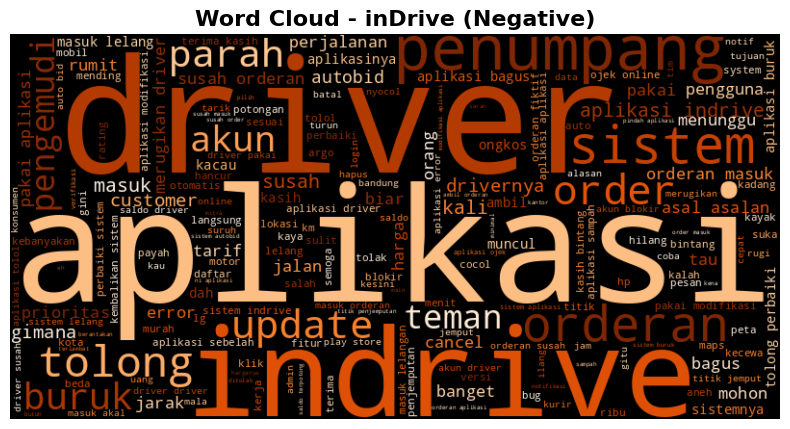

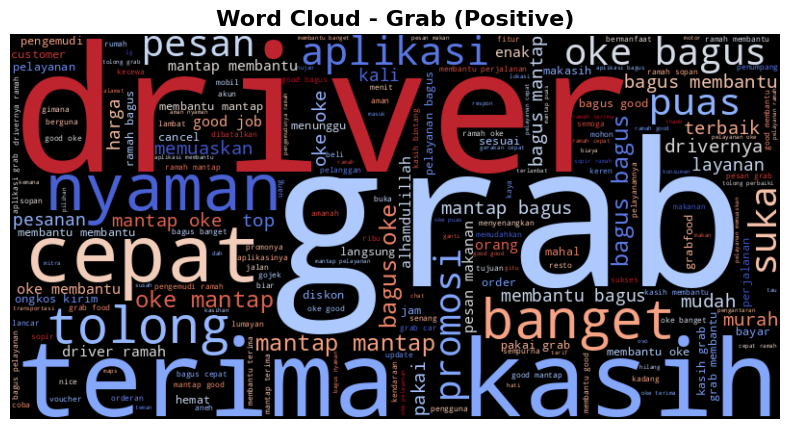

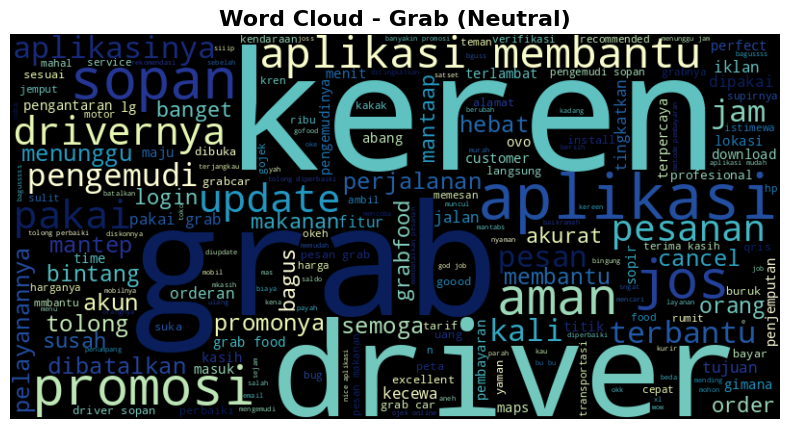

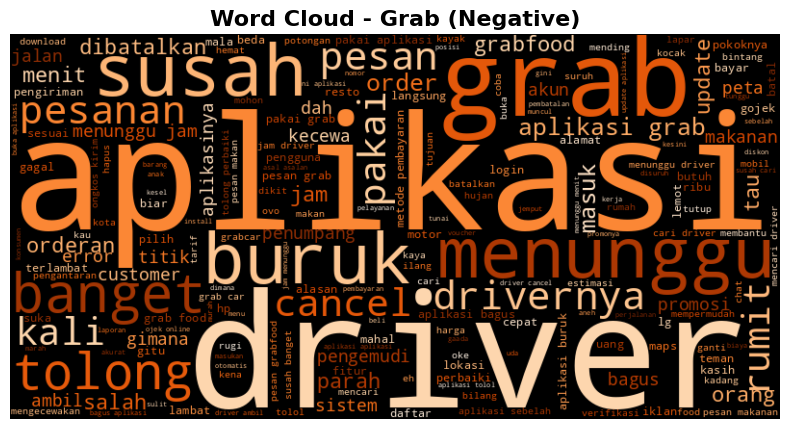

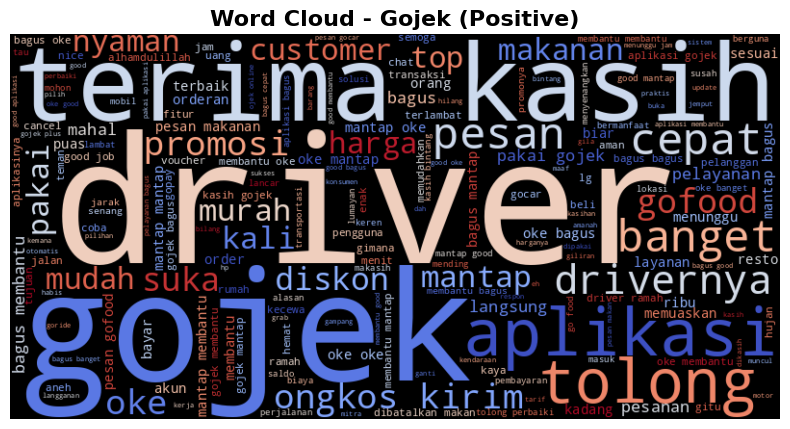

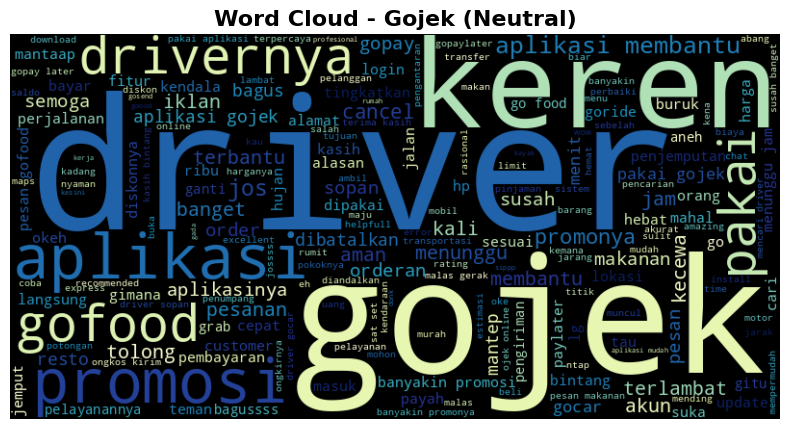

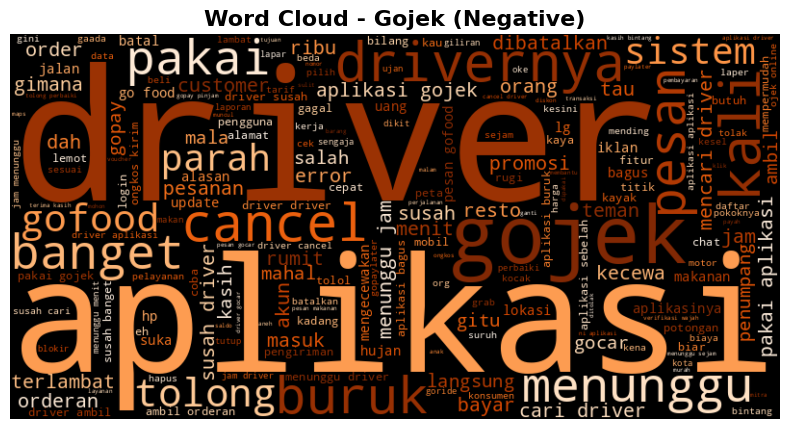

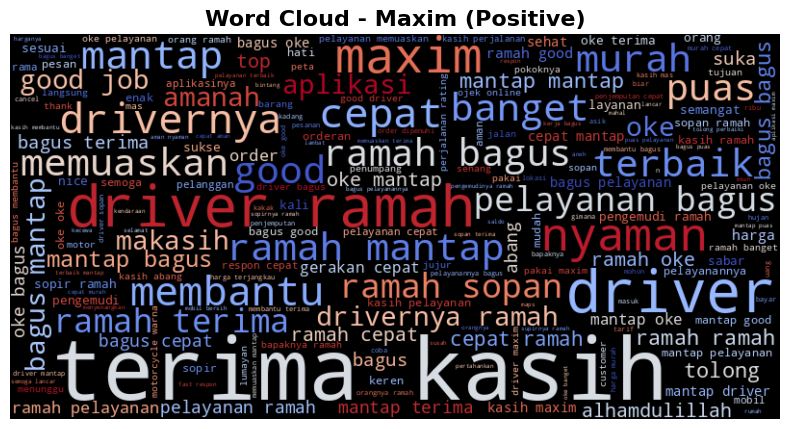

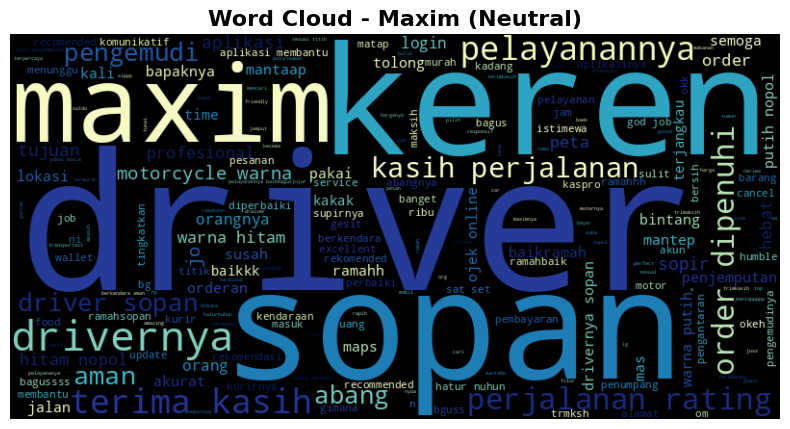

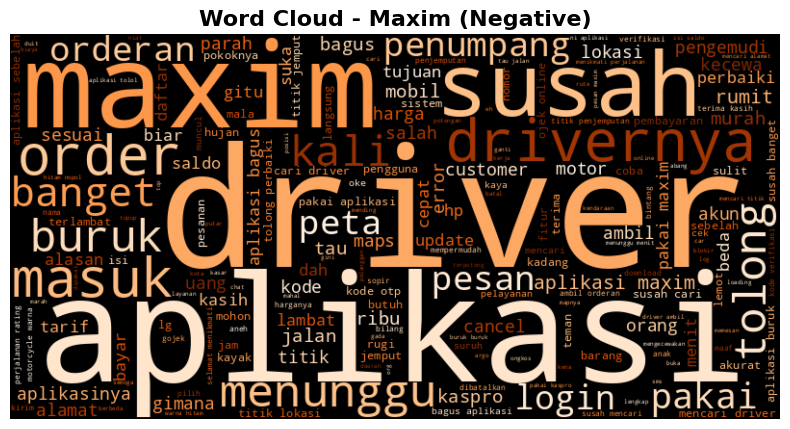

In [60]:
# Visualisasi Word Cloud untuk masing-masing aplikasi dan sentimen
applications = ['inDrive', 'Grab', 'Gojek', 'Maxim']
sentiments = ['positive', 'neutral', 'negative']

for app in applications:
    for sentiment in sentiments:
        # Filter data berdasarkan aplikasi dan sentimen
        app_data = clean_df[(clean_df['appName'] == app) & (clean_df['polarity'] == sentiment)]
        text = ' '.join(app_data['text_final'].astype(str))  # Gabungkan semua teks

        # Buat word cloud
        wordcloud = WordCloud(
            background_color='black',
            colormap='coolwarm' if sentiment == 'positive' else 'YlGnBu' if sentiment == 'neutral' else 'Oranges',
            max_words=200,
            width=800,
            height=400
        ).generate(text)

        # Plot word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud - {app} ({sentiment.capitalize()})', fontsize=16, weight='bold')
        plt.show()